<a href="https://colab.research.google.com/github/ebrambilla42/cv1_assignements/blob/main/CV1_03_es2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Fitting a line using RANSAC

## Task

Suppose you have some prior feature points extracted using some black box algorithm and they are stored in ”noisyedgepoints.npy” that you can download from Moodle. Those feature points represent a noisy version of an edge. Some of them are outliers and are not supposed to be part of the edge. Use the scikit library to fit the features such that you generate a best fitting line us- ing RANSAC ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_ model.RANSACRegressor.html). Alternatively, you may also implement your own version of RANSAC from scratch. The data file can be read as:

### Import Numpy file

In [29]:
#download raw data (noisyedgepoints.npy)
import requests
import io
url = "https://github.com/ebrambilla42/cv1_assignements/blob/main/CV1_3/noisyedgepoints.npy?raw=true" 
download = requests.get(url).content

#save in file 
with open('noisyedgepoints.npy', 'wb') as f:
  f.write(download)
  f.close()


In [30]:
##load data from downloaded file 
import numpy as np
with open('noisyedgepoints.npy', 'rb') as f:
  X = np.load(f) 
  y = np.load(f)
  f.close()

### After fitting the line, plot the outliers that got filtered by the RANSAC algorithm and the inliers respectively. The result should be similar to Figure 3.


- proportion of outliers: 50%
- change trshold value

In [31]:
#fit the line
from sklearn import linear_model

#Calling RANSAC-Regressor to find the best possible fit using the data points
ransac = linear_model.RANSACRegressor().fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)


ransac.score(X, y)


0.38145998973005907

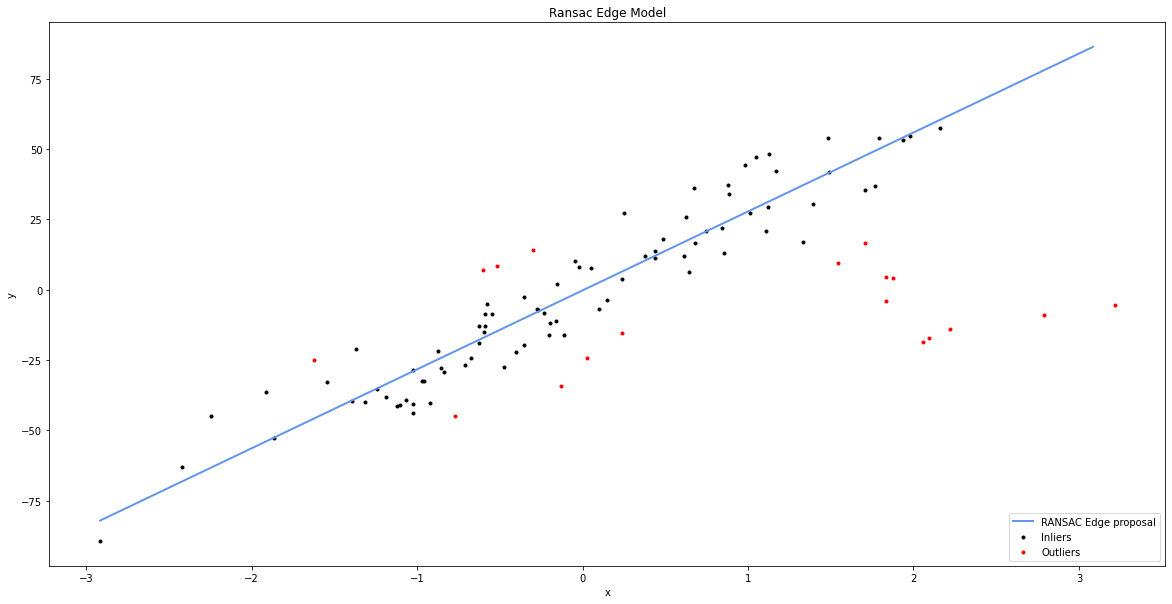

In [32]:
#plot the graph
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))

plt.scatter(X[inlier_mask], y[inlier_mask], color='black', marker='.',
            label='Inliers')

plt.scatter(X[outlier_mask], y[outlier_mask], color='red', marker='.',
            label='Outliers')

plt.plot(line_X, line_y_ransac, color='cornflowerblue', 
         linewidth=2,
         label='RANSAC Edge proposal')

plt.legend(loc='lower right')
plt.title('Ransac Edge Model')
plt.xlabel("x")
plt.ylabel("y")
plt.show()